<a href="https://colab.research.google.com/github/bavel4885/python_test/blob/main/03_Keras_API_%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%9C_MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B_%EB%B6%84%EB%A5%98_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DNN(MLP) 모델을 이용한 MNIST 데이터 셋 분류

In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

* Step 1-1. Inptu tensor 와 Target tensor 준비(훈련데이터)

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [4]:
train_images[0].shape

(28, 28)

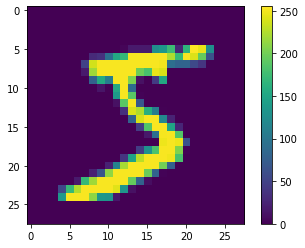

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_labels[0]

5

In [ ]:
#one hot vector
#[0,0,0,0,0,0,0,0,0]

* Step 1-2. 입력데이터의 전처리 

In [8]:
# (60000, 28, 28) => (60000, 28*28)
train_images = train_images.reshape((60000, 28*28))

In [9]:
print(train_images.shape)

(60000, 784)


In [10]:
print(test_images.shape)

(10000, 28, 28)


In [11]:
test_images = test_images.reshape((10000, 28*28))

In [12]:
print(test_images.shape)

(10000, 784)


* Step2. DNN(MLP) 모델 디자인

In [13]:
from tensorflow.keras import models, layers

In [14]:
model = models.Sequential()
# hdden layer 256 퍼셉트론
model.add(layers.Dense(units=256, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(units=10, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


* Step 3. 모델의 학습 정보 설정

In [16]:
# loss, optimizer, metric
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',#one hot vector는 sparce를 지움
              metrics=['accuracy'])

* Step 4. 모델에 input, target 데이터 연결 후 학습

In [17]:
history = model.fit(x=train_images, y=train_labels,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/30
375/375 [==============================] - 4s 4ms/step - loss: 5.8564 - accuracy: 0.8737 - val_loss: 1.1150 - val_accuracy: 0.9255
Epoch 2/30
375/375 [==============================] - 1s 3ms/step - loss: 0.7124 - accuracy: 0.9367 - val_loss: 0.5738 - val_accuracy: 0.9448
Epoch 3/30
375/375 [==============================] - 1s 3ms/step - loss: 0.4296 - accuracy: 0.9525 - val_loss: 0.5692 - val_accuracy: 0.9477
Epoch 4/30
375/375 [==============================] - 1s 3ms/step - loss: 0.3339 - accuracy: 0.9629 - val_loss: 0.5730 - val_accuracy: 0.9492
Epoch 5/30
375/375 [==============================] - 1s 3ms/step - loss: 0.2715 - accuracy: 0.9699 - val_loss: 0.6387 - val_accuracy: 0.9585
Epoch 6/30
375/375 [==============================] - 1s 3ms/step - loss: 0.2300 - accuracy: 0.9739 - val_loss: 0.5908 - val_accuracy: 0.9564
Epoch 7/30
375/375 [==============================] - 1s 3ms/step - loss: 0.2043 - accuracy: 0.9777 - val_loss: 0.7362 - val_accuracy: 0.9565
Epoch 

* 학습 과정 시각화 및 테스트

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [19]:
acc

[0.8737291693687439,
 0.9367291927337646,
 0.9525208473205566,
 0.9628958106040955,
 0.9698749780654907,
 0.9739375114440918,
 0.9776874780654907,
 0.9798333048820496,
 0.9826458096504211,
 0.9842708110809326,
 0.9863333106040955,
 0.987375020980835,
 0.9884374737739563,
 0.9889583587646484,
 0.9896041750907898,
 0.9913125038146973,
 0.9902708530426025,
 0.9914374947547913,
 0.9924166798591614,
 0.991937518119812,
 0.9929375052452087,
 0.9932291507720947,
 0.9931666851043701,
 0.9943125247955322,
 0.9946458339691162,
 0.9948541522026062,
 0.9950624704360962,
 0.9946041703224182,
 0.9945833086967468,
 0.9954166412353516]

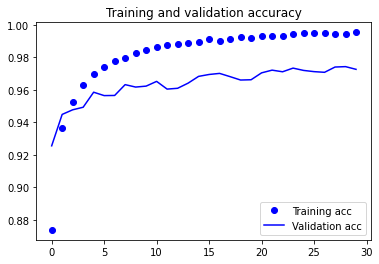

In [20]:
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

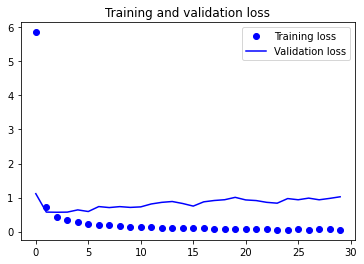

In [21]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [22]:
test_loss, test_acc = model.evaluate(x=test_images, y=test_labels)#모델 평가

313/313 [==============================] - 1s 2ms/step - loss: 0.9590 - accuracy: 0.9734


In [23]:
import numpy as np

In [24]:
predict = model.predict(test_images[0].reshape((1, 28*28)))

In [25]:
predict

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [26]:
print(np.argmax(predict[0]))

7


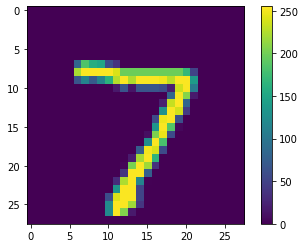

In [27]:
plt.figure()
plt.imshow(test_images[0].reshape(28, 28))
plt.colorbar()
plt.grid(False)
plt.show()